In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Loading the data
ratings = pd.read_csv(r'D:\ML_Projects\2_MovieRecommender\data\raw\ratings.csv')
movies = pd.read_csv(r'D:\ML_Projects\2_MovieRecommender\data\raw\movies.csv')
tags = pd.read_csv(r'D:\ML_Projects\2_MovieRecommender\data\raw\tags.csv')

In [ ]:
print(ratings.shape, movies.shape, tags.shape)

In [5]:
ratings.info()
movies.info()
tags.info()

<class 'pandas.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
<class 'pandas.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  87585 non-null  int64
 1   title    87585 non-null  str  
 2   genres   87585 non-null  str  
dtypes: int64(1), str(2)
memory usage: 2.0 MB
<class 'pandas.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype
---  ------     -----
 0   userId     int64
 1   movieId    int64
 2   tag        str  
 3   timestamp  int64
dtypes: int64(3), str(1)
memory usage: 61.0 MB


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


### Visualizing the data using Plots

In [9]:
# Set the style
sns.set_style("whitegrid")

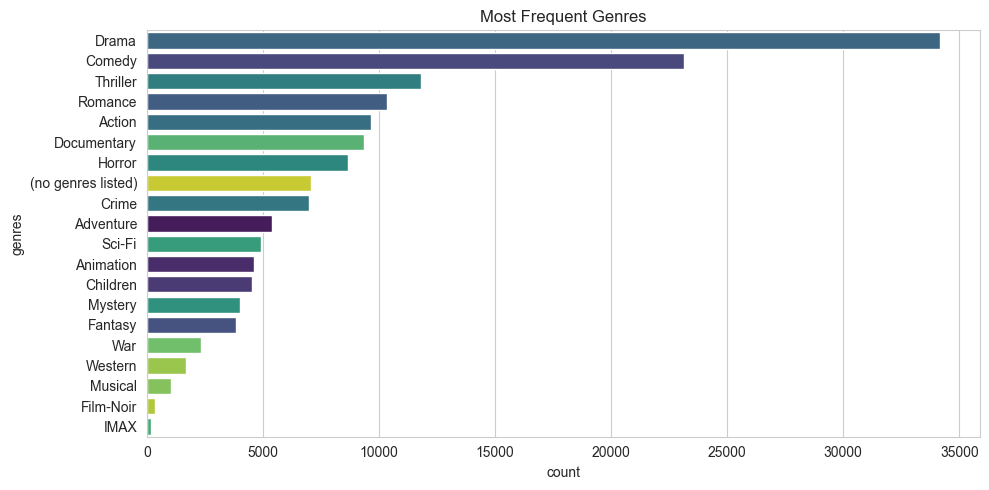

In [15]:
# Plot: Popularity of Genres
all_genres = movies['genres'].str.split('|').explode()
plt.figure(figsize=(10,5))
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis', hue=all_genres,legend=False)
plt.title('Most Frequent Genres')
plt.tight_layout()
plt.savefig(r'D:\ML_Projects\2_MovieRecommender\plots\most_frequent_genres.png')
plt.show()

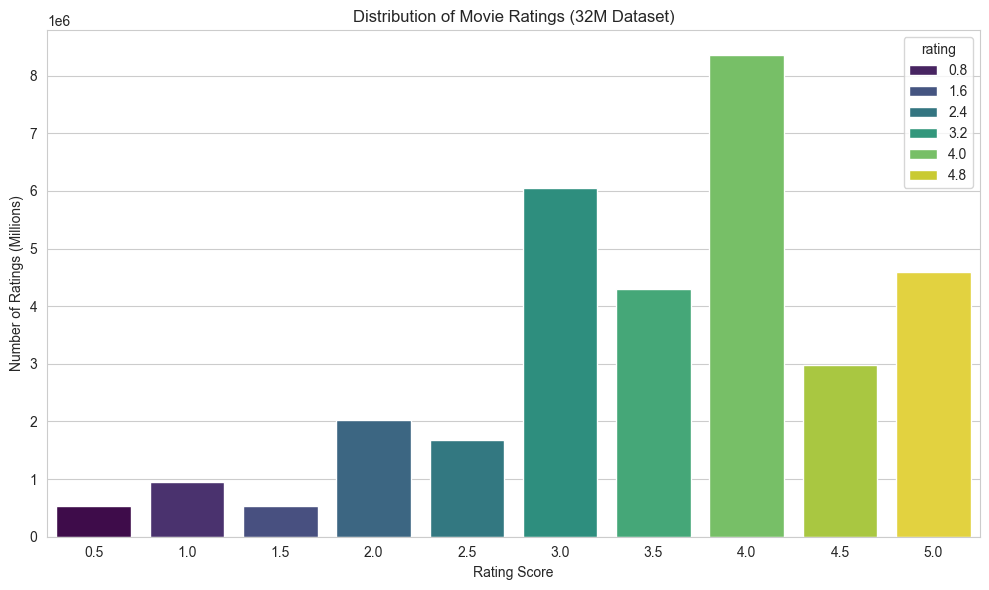

In [16]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings,hue='rating', palette='viridis')
plt.title('Distribution of Movie Ratings (32M Dataset)')
plt.xlabel('Rating Score')
plt.ylabel('Number of Ratings (Millions)')
plt.tight_layout()
plt.savefig(r'D:\ML_Projects\2_MovieRecommender\plots\ratings_distribution.png')
plt.show()

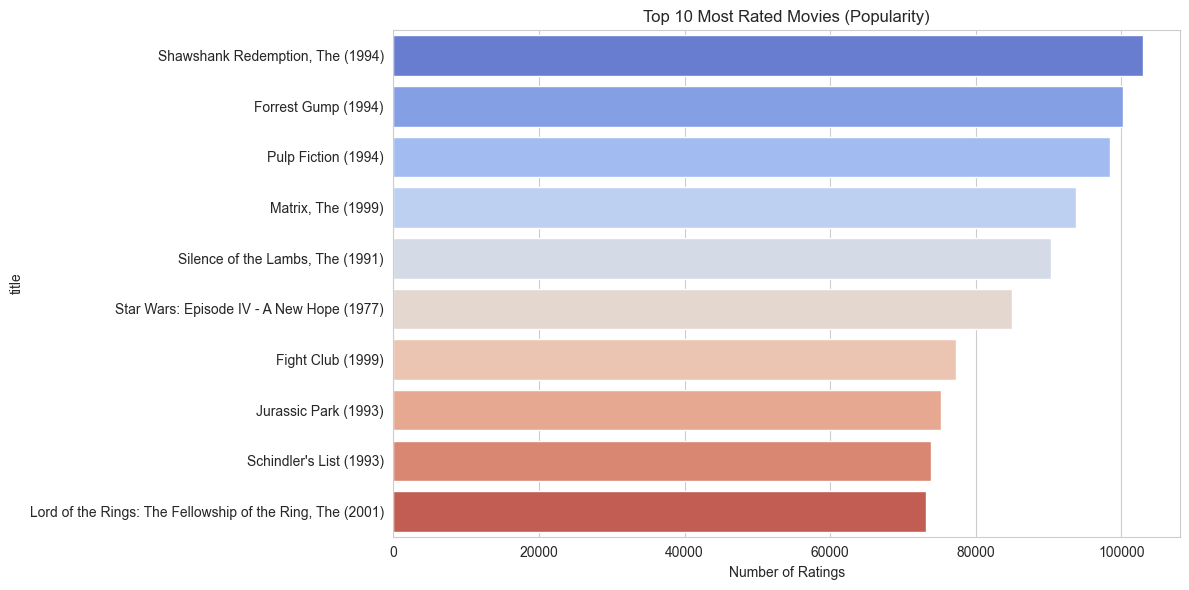

In [18]:
# Top 10 Most rated Movies
# Merge movies and ratings for names
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_stats = movie_ratings.groupby('title').agg({'rating': ['size', 'mean']})

# Flatten columns
movie_stats.columns = ['rating_count', 'average_rating']

# Sort by most ratings
top_rated = movie_stats.sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated['rating_count'], y=top_rated.index,  hue=top_rated.index, legend=False,palette='coolwarm')
plt.title('Top 10 Most Rated Movies (Popularity)')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.savefig(r'D:\ML_Projects\2_MovieRecommender\plots\top_10_rated_movies.png')
plt.show()

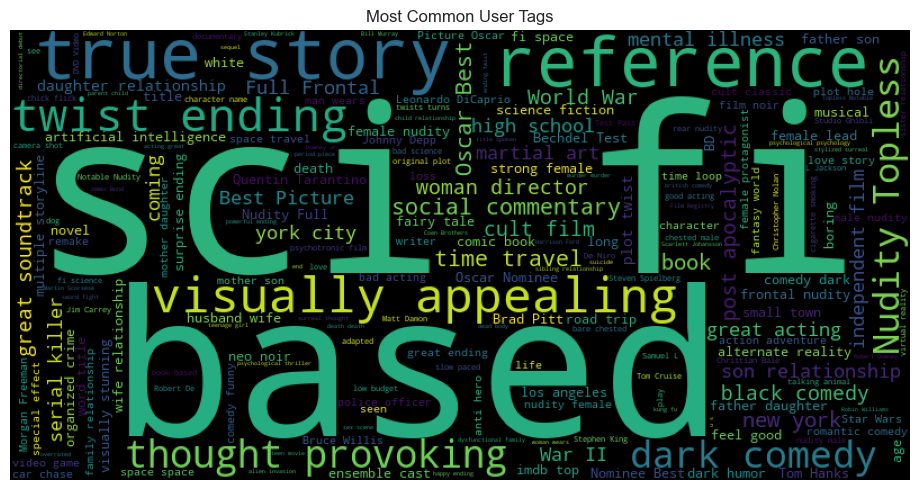

In [19]:
# Word Cloud: Popular Tags
tag_text = ' '.join(tags['tag'].fillna('').astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(tag_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common User Tags')
plt.tight_layout()
plt.savefig(r'D:\ML_Projects\2_MovieRecommender\plots\popular_tags.png')
plt.show()